In [17]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
# Import scipy to get sparse arrays
import scipy
from scipy import sparse
from scipy.sparse import linalg

## Poisson or Laplace equation

In [18]:
# We apply these for both x and y
Xmin = 0
Xmax = 1
Nx   = 100
# Set up x using Xmin, Xmax, Nx, and calculate dx
# Alternative would be to calculate dx, and use that
# to set up x Just make sure that they are consistent.
x    = np.linspace(Xmin, Xmax, Nx)
dx   = x[1] - x[0]

# Tolerance, to determine when solution is close enough
tol = 1e-15

# Dimension 2 to hold current and next timestep
U = np.zeros((2, Nx + 2, Nx + 2)) # Adding ghost cells

# Setup, boundaries and guess at initial value

# Boundaries
U[0, 0, :] = 1.0
U[0,-1, :] = 1.0
U[0, :, 0] = 0.0
U[0, :,-1] = 0.0

# Initial guess in the interior:
U[0, 1:Nx+1, 1:Nx+1] = 0.5

In [19]:
rho = np.zeros((Nx, Nx))
rho[Nx/2, Nx/2] = 2

/Users/nordam/.pyenv/versions/3.4.2/lib/python3.4/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [20]:
# Now we are ready to proceed with the update loop

# variable to measure error:
err = 2*tol
tic = time()
while err > tol:
    # Calculate next step, then copy:
    # next -> current
    U[1, 1:Nx+1, 1:Nx+1] = (
        U[0,2:,1:Nx+1] + U[0,:Nx,1:Nx+1] 
        +   U[0,1:Nx+1,2:] + U[0,1:Nx+1,:Nx]
        )/4 + rho
    
    # Calculate error:
    err = np.sum((U[0, 1:Nx+1, 1:Nx+1] - U[1, 1:Nx+1, 1:Nx+1])**2)
    print('Error: %.3e' % err, '\r', end = '')
    
    # Copy (after calculating error)
    U[0,1:Nx+1,1:Nx+1] = U[1,1:Nx+1,1:Nx+1]
    

toc = time()
print('The calculation took %s seconds' % (toc - tic))

The calculation took 6.007421970367432 seconds


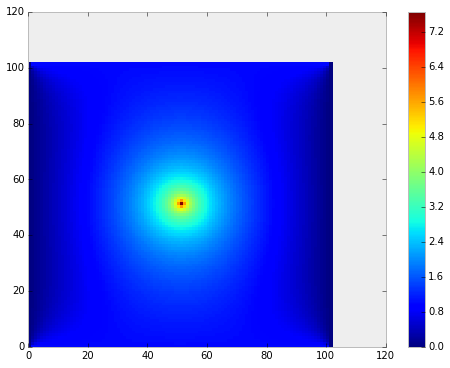

In [21]:
# Plotting as heatmap
fig = plt.figure(figsize = (8,6))
X, Y = np.meshgrid(x, x)
mesh = plt.pcolormesh(U[0, :, :])
plt.colorbar(mesh)

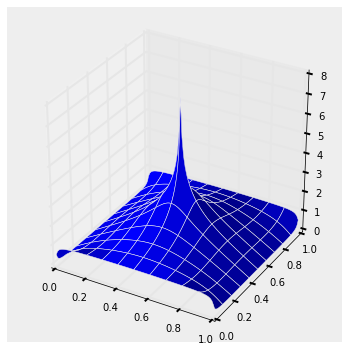

In [22]:
# Plotting as 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,6))
ax  = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, U[1, 1:Nx+1, 1:Nx+1])